# DS processing with CLI

In this tutorial, we demostrate how to do standard DS processing with the decorrelation CLI interface.

## Load GAMMA result

The data from gamma software needed for this tutorial:

In [ ]:
!ls -R ../../data/gamma/

/bin/zsh: /users/kangl/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/zsh)
../../data/gamma/:
DEM  geocoding	rslc

../../data/gamma/DEM:
dem_seg  dem_seg_par

../../data/gamma/geocoding:
20210802.ccp	      20210802.look_angle      20210802.pix_gamma0_filled
20210802.coffs	      20210802.ls_map	       20210802.pix_gamma0_filled.bmp
20210802.coffsets     20210802.ls_map_rdc      20210802.pix_sigma0
20210802.diff_par     20210802.ls_map_rdc.bmp  20210802.psi
20210802.geo.mli      20210802.lt	       20210802.rdc2geo
20210802.geo.mli.bmp  20210802.lt_fine	       20210802.rdc2geo_lat
20210802.geo.mli.kml  20210802.offnadir        20210802.rdc2geo_lon
20210802.geo.mli.png  20210802.offs	       20210802.res
20210802.geo.mli.tif  20210802.offsets	       20210802.sim_sar
20210802.hgt	      20210802.pix	       20210802.u
20210802.hgt.bmp      20210802.pix_gamma0      20210802.v
20210802.inc	      20210802.pix_gamma0.bmp

../../data/gamma/rslc:
20210802.rslc	   20

And we load them with functions in the `load` module:

In [ ]:
from decorrelation.cli.load import (de_load_gamma_flatten_rslc,
                                    de_load_gamma_lat_lon,
                                    de_load_gamma_hgt,
                                    de_load_gamma_incidence_angle,
                                    de_load_gamma_range,
                                    de_load_gamma_metadata)

The detailed usage of these functions is explained [here](../CLI/load.ipynb)

In [ ]:
rslc_dir = '../../data/gamma/rslc'
reference = '20220620'
rslc_par = '../../data/gamma/rslc/20220620.rslc.par'
hgt = '../../data/gamma/geocoding/20210802.hgt'
lt = '../../data/gamma/geocoding/20210802.lt_fine'
dem_par = '../../data/gamma/DEM/dem_seg_par'
inc = '../../data/gamma/geocoding/20210802.inc'
az_chunk_size = 1000

rslc_zarr = './DS_Processing_with_CLI/rslc.zarr'
lat_zarr = './DS_Processing_with_CLI/lat.zarr'
lon_zarr = './DS_Processing_with_CLI/lon.zarr'
inc_zarr = './DS_Processing_with_CLI/inc.zarr'
hgt_zarr = './DS_Processing_with_CLI/hgt.zarr'
range_zarr = './DS_Processing_with_CLI/range.zarr'
meta_file = './DS_Processing_with_CLI/meta.toml'

In [ ]:
de_load_gamma_flatten_rslc(rslc_dir,reference,hgt,rslc_zarr,az_chunk_size)
de_load_gamma_lat_lon(lt,rslc_par,dem_par,lat_zarr,lon_zarr,az_chunk_size)
de_load_gamma_incidence_angle(inc,lt,rslc_par,dem_par,inc_zarr,az_chunk_size)
de_load_gamma_hgt(hgt,rslc_par,hgt_zarr,az_chunk_size)
de_load_gamma_range(rslc_par,range_zarr,az_chunk_size)
de_load_gamma_metadata(rslc_dir,reference,meta_file)

2023-09-15 18:05:20 - de_load_gamma_flatten_rslc - INFO - fetching args:
2023-09-15 18:05:20 - de_load_gamma_flatten_rslc - INFO - rslc_dir = '../../data/gamma/rslc'
2023-09-15 18:05:20 - de_load_gamma_flatten_rslc - INFO - reference = '20220620'
2023-09-15 18:05:20 - de_load_gamma_flatten_rslc - INFO - hgt = '../../data/gamma/geocoding/20210802.hgt'
2023-09-15 18:05:20 - de_load_gamma_flatten_rslc - INFO - rslc_zarr = './DS_Processing_with_CLI/rslc.zarr'
2023-09-15 18:05:20 - de_load_gamma_flatten_rslc - INFO - az_chunk_size = 1000
2023-09-15 18:05:20 - de_load_gamma_flatten_rslc - INFO - log = None
2023-09-15 18:05:20 - de_load_gamma_flatten_rslc - INFO - fetching args done.
2023-09-15 18:05:20 - de_load_gamma_flatten_rslc - INFO - rslc found: 
        date                                 rslc  \
0   20210802  ../../data/gamma/rslc/20210802.rslc   
1   20210816  ../../data/gamma/rslc/20210816.rslc   
2   20210830  ../../data/gamma/rslc/20210830.rslc   
3   20210913  ../../data/gamma/

sh: /users/kangl/miniconda3/lib/libtinfo.so.6: no version information available (required by sh)
sh: /users/kangl/miniconda3/lib/libtinfo.so.6: no version information available (required by sh)


output line:   1000  SLC-1 azimuth line: 1000.5
output line:   2000  SLC-1 azimuth line: 2000.5

simulated unwrapped phase: /tmp/tmp2dh4b78j/20220620_20210802.sim_orb
width: 1834 lines: 2500

user time (s):        35.700
system time (s):       0.660
elapsed time (s):      1.170

2023-09-15 18:05:21 - de_load_gamma_flatten_rslc - INFO - run command: create_offset ../../data/gamma/rslc/20220620.rslc.par ../../data/gamma/rslc/20210816.rslc.par /tmp/tmp2dh4b78j/20220620_20210816.off 1 1 1 0
*** Create and update ISP offset and interferogram parameter files ***
*** Copyright 2020 Gamma Remote Sensing v5.5 clw/uw/cm 21-Sep-2020 ***
SLC-1 title: ALOS2436071220-220620
SLC-1 Doppler centroid at center swath (Hz):    -52.731
SLC-1 number of range samples:             1834
SLC-1 number of image lines:               2500
SLC-1 slant range pixel spacing (m):   4.290540
SLC-1 azimuth sample spacing (m):      3.740105

SLC-2 title: ALOS2390531220-210816
SLC-2 Doppler centroid at center swath (Hz):   

sh: /users/kangl/miniconda3/lib/libtinfo.so.6: no version information available (required by sh)
sh: /users/kangl/miniconda3/lib/libtinfo.so.6: no version information available (required by sh)


output line:   1000  SLC-1 azimuth line: 1000.5
output line:   2000  SLC-1 azimuth line: 2000.5

simulated unwrapped phase: /tmp/tmp2dh4b78j/20220620_20210816.sim_orb
width: 1834 lines: 2500

user time (s):        29.990
system time (s):       0.470
elapsed time (s):      0.900

2023-09-15 18:05:22 - de_load_gamma_flatten_rslc - INFO - run command: create_offset ../../data/gamma/rslc/20220620.rslc.par ../../data/gamma/rslc/20210830.rslc.par /tmp/tmp2dh4b78j/20220620_20210830.off 1 1 1 0
*** Create and update ISP offset and interferogram parameter files ***
*** Copyright 2020 Gamma Remote Sensing v5.5 clw/uw/cm 21-Sep-2020 ***
SLC-1 title: ALOS2436071220-220620
SLC-1 Doppler centroid at center swath (Hz):    -52.731
SLC-1 number of range samples:             1834
SLC-1 number of image lines:               2500
SLC-1 slant range pixel spacing (m):   4.290540
SLC-1 azimuth sample spacing (m):      3.740105

SLC-2 title: ALOS2392601220-210830
SLC-2 Doppler centroid at center swath (Hz):   

sh: /users/kangl/miniconda3/lib/libtinfo.so.6: no version information available (required by sh)
sh: /users/kangl/miniconda3/lib/libtinfo.so.6: no version information available (required by sh)


output line:   1000  SLC-1 azimuth line: 1000.5
output line:   2000  SLC-1 azimuth line: 2000.5

simulated unwrapped phase: /tmp/tmp2dh4b78j/20220620_20210830.sim_orb
width: 1834 lines: 2500

user time (s):        32.700
system time (s):       0.470
elapsed time (s):      1.040

2023-09-15 18:05:24 - de_load_gamma_flatten_rslc - INFO - run command: create_offset ../../data/gamma/rslc/20220620.rslc.par ../../data/gamma/rslc/20210913.rslc.par /tmp/tmp2dh4b78j/20220620_20210913.off 1 1 1 0
*** Create and update ISP offset and interferogram parameter files ***
*** Copyright 2020 Gamma Remote Sensing v5.5 clw/uw/cm 21-Sep-2020 ***
SLC-1 title: ALOS2436071220-220620
SLC-1 Doppler centroid at center swath (Hz):    -52.731
SLC-1 number of range samples:             1834
SLC-1 number of image lines:               2500
SLC-1 slant range pixel spacing (m):   4.290540
SLC-1 azimuth sample spacing (m):      3.740105

SLC-2 title: ALOS2394671220-210913
SLC-2 Doppler centroid at center swath (Hz):   

sh: /users/kangl/miniconda3/lib/libtinfo.so.6: no version information available (required by sh)
sh: /users/kangl/miniconda3/lib/libtinfo.so.6: no version information available (required by sh)


*** Simulate unwrapped interferometric phase using DEM height and deformation rate using orbit state vectors ***
*** Copyright 2022, Gamma Remote Sensing, v2.9, 4-May-2022 clw/cm ***
OPENMP: number of physical processors:                     128
OPENMP: default max. number of threads (program specific): 8
OPENMP: current max. number of available threads:          36
OPENMP: number of program threads: 36

SLC-1 image parameter file:  ../../data/gamma/rslc/20220620.rslc.par
SLC-2R image parameter file: ../../data/gamma/rslc/20210913.rslc.par
int_mode = 1: repeat-pass interferometric mode (default)

ISP interferogram/offset parameter file: /tmp/tmp2dh4b78j/20220620_20210913.off
height map file: /work/users/kangl/decorrelation/nbs/Tutorials/../../data/gamma/geocoding/20210802.hgt
output simulated interferometric phase: /tmp/tmp2dh4b78j/20220620_20210913.sim_orb
geometric reference SLC parameter file: ../../data/gamma/rslc/20220620.rslc.par
NOTE: no deformation rate file entered: deformatio

sh: /users/kangl/miniconda3/lib/libtinfo.so.6: no version information available (required by sh)
sh: /users/kangl/miniconda3/lib/libtinfo.so.6: no version information available (required by sh)


*** Simulate unwrapped interferometric phase using DEM height and deformation rate using orbit state vectors ***
*** Copyright 2022, Gamma Remote Sensing, v2.9, 4-May-2022 clw/cm ***
OPENMP: number of physical processors:                     128
OPENMP: default max. number of threads (program specific): 8
OPENMP: current max. number of available threads:          36
OPENMP: number of program threads: 36

SLC-1 image parameter file:  ../../data/gamma/rslc/20220620.rslc.par
SLC-2R image parameter file: ../../data/gamma/rslc/20211011.rslc.par
int_mode = 1: repeat-pass interferometric mode (default)

ISP interferogram/offset parameter file: /tmp/tmp2dh4b78j/20220620_20211011.off
height map file: /work/users/kangl/decorrelation/nbs/Tutorials/../../data/gamma/geocoding/20210802.hgt
output simulated interferometric phase: /tmp/tmp2dh4b78j/20220620_20211011.sim_orb
geometric reference SLC parameter file: ../../data/gamma/rslc/20220620.rslc.par
NOTE: no deformation rate file entered: deformatio

sh: /users/kangl/miniconda3/lib/libtinfo.so.6: no version information available (required by sh)
sh: /users/kangl/miniconda3/lib/libtinfo.so.6: no version information available (required by sh)


*** Simulate unwrapped interferometric phase using DEM height and deformation rate using orbit state vectors ***
*** Copyright 2022, Gamma Remote Sensing, v2.9, 4-May-2022 clw/cm ***
OPENMP: number of physical processors:                     128
OPENMP: default max. number of threads (program specific): 8
OPENMP: current max. number of available threads:          36
OPENMP: number of program threads: 36

SLC-1 image parameter file:  ../../data/gamma/rslc/20220620.rslc.par
SLC-2R image parameter file: ../../data/gamma/rslc/20211025.rslc.par
int_mode = 1: repeat-pass interferometric mode (default)

ISP interferogram/offset parameter file: /tmp/tmp2dh4b78j/20220620_20211025.off
height map file: /work/users/kangl/decorrelation/nbs/Tutorials/../../data/gamma/geocoding/20210802.hgt
output simulated interferometric phase: /tmp/tmp2dh4b78j/20220620_20211025.sim_orb
geometric reference SLC parameter file: ../../data/gamma/rslc/20220620.rslc.par
NOTE: no deformation rate file entered: deformatio

sh: /users/kangl/miniconda3/lib/libtinfo.so.6: no version information available (required by sh)
sh: /users/kangl/miniconda3/lib/libtinfo.so.6: no version information available (required by sh)


*** Simulate unwrapped interferometric phase using DEM height and deformation rate using orbit state vectors ***
*** Copyright 2022, Gamma Remote Sensing, v2.9, 4-May-2022 clw/cm ***
OPENMP: number of physical processors:                     128
OPENMP: default max. number of threads (program specific): 8
OPENMP: current max. number of available threads:          36
OPENMP: number of program threads: 36

SLC-1 image parameter file:  ../../data/gamma/rslc/20220620.rslc.par
SLC-2R image parameter file: ../../data/gamma/rslc/20220606.rslc.par
int_mode = 1: repeat-pass interferometric mode (default)

ISP interferogram/offset parameter file: /tmp/tmp2dh4b78j/20220620_20220606.off
height map file: /work/users/kangl/decorrelation/nbs/Tutorials/../../data/gamma/geocoding/20210802.hgt
output simulated interferometric phase: /tmp/tmp2dh4b78j/20220620_20220606.sim_orb
geometric reference SLC parameter file: ../../data/gamma/rslc/20220620.rslc.par
NOTE: no deformation rate file entered: deformatio

sh: /users/kangl/miniconda3/lib/libtinfo.so.6: no version information available (required by sh)
sh: /users/kangl/miniconda3/lib/libtinfo.so.6: no version information available (required by sh)


*** Simulate unwrapped interferometric phase using DEM height and deformation rate using orbit state vectors ***
*** Copyright 2022, Gamma Remote Sensing, v2.9, 4-May-2022 clw/cm ***
OPENMP: number of physical processors:                     128
OPENMP: default max. number of threads (program specific): 8
OPENMP: current max. number of available threads:          36
OPENMP: number of program threads: 36

SLC-1 image parameter file:  ../../data/gamma/rslc/20220620.rslc.par
SLC-2R image parameter file: ../../data/gamma/rslc/20220620.rslc.par
int_mode = 1: repeat-pass interferometric mode (default)

ISP interferogram/offset parameter file: /tmp/tmp2dh4b78j/20220620_20220620.off
height map file: /work/users/kangl/decorrelation/nbs/Tutorials/../../data/gamma/geocoding/20210802.hgt
output simulated interferometric phase: /tmp/tmp2dh4b78j/20220620_20220620.sim_orb
geometric reference SLC parameter file: ../../data/gamma/rslc/20220620.rslc.par
NOTE: no deformation rate file entered: deformatio

sh: /users/kangl/miniconda3/lib/libtinfo.so.6: no version information available (required by sh)
sh: /users/kangl/miniconda3/lib/libtinfo.so.6: no version information available (required by sh)


*** Simulate unwrapped interferometric phase using DEM height and deformation rate using orbit state vectors ***
*** Copyright 2022, Gamma Remote Sensing, v2.9, 4-May-2022 clw/cm ***
OPENMP: number of physical processors:                     128
OPENMP: default max. number of threads (program specific): 8
OPENMP: current max. number of available threads:          36
OPENMP: number of program threads: 36

SLC-1 image parameter file:  ../../data/gamma/rslc/20220620.rslc.par
SLC-2R image parameter file: ../../data/gamma/rslc/20220704.rslc.par
int_mode = 1: repeat-pass interferometric mode (default)

ISP interferogram/offset parameter file: /tmp/tmp2dh4b78j/20220620_20220704.off
height map file: /work/users/kangl/decorrelation/nbs/Tutorials/../../data/gamma/geocoding/20210802.hgt
output simulated interferometric phase: /tmp/tmp2dh4b78j/20220620_20220704.sim_orb
geometric reference SLC parameter file: ../../data/gamma/rslc/20220620.rslc.par
NOTE: no deformation rate file entered: deformatio

sh: /users/kangl/miniconda3/lib/libtinfo.so.6: no version information available (required by sh)
sh: /users/kangl/miniconda3/lib/libtinfo.so.6: no version information available (required by sh)


*** Simulate unwrapped interferometric phase using DEM height and deformation rate using orbit state vectors ***
*** Copyright 2022, Gamma Remote Sensing, v2.9, 4-May-2022 clw/cm ***
OPENMP: number of physical processors:                     128
OPENMP: default max. number of threads (program specific): 8
OPENMP: current max. number of available threads:          36
OPENMP: number of program threads: 36

SLC-1 image parameter file:  ../../data/gamma/rslc/20220620.rslc.par
SLC-2R image parameter file: ../../data/gamma/rslc/20220718.rslc.par
int_mode = 1: repeat-pass interferometric mode (default)

ISP interferogram/offset parameter file: /tmp/tmp2dh4b78j/20220620_20220718.off
height map file: /work/users/kangl/decorrelation/nbs/Tutorials/../../data/gamma/geocoding/20210802.hgt
output simulated interferometric phase: /tmp/tmp2dh4b78j/20220620_20220718.sim_orb
geometric reference SLC parameter file: ../../data/gamma/rslc/20220620.rslc.par
NOTE: no deformation rate file entered: deformatio

sh: /users/kangl/miniconda3/lib/libtinfo.so.6: no version information available (required by sh)
sh: /users/kangl/miniconda3/lib/libtinfo.so.6: no version information available (required by sh)


*** Simulate unwrapped interferometric phase using DEM height and deformation rate using orbit state vectors ***
*** Copyright 2022, Gamma Remote Sensing, v2.9, 4-May-2022 clw/cm ***
OPENMP: number of physical processors:                     128
OPENMP: default max. number of threads (program specific): 8
OPENMP: current max. number of available threads:          36
OPENMP: number of program threads: 36

SLC-1 image parameter file:  ../../data/gamma/rslc/20220620.rslc.par
SLC-2R image parameter file: ../../data/gamma/rslc/20220801.rslc.par
int_mode = 1: repeat-pass interferometric mode (default)

ISP interferogram/offset parameter file: /tmp/tmp2dh4b78j/20220620_20220801.off
height map file: /work/users/kangl/decorrelation/nbs/Tutorials/../../data/gamma/geocoding/20210802.hgt
output simulated interferometric phase: /tmp/tmp2dh4b78j/20220620_20220801.sim_orb
geometric reference SLC parameter file: ../../data/gamma/rslc/20220620.rslc.par
NOTE: no deformation rate file entered: deformatio

sh: /users/kangl/miniconda3/lib/libtinfo.so.6: no version information available (required by sh)
sh: /users/kangl/miniconda3/lib/libtinfo.so.6: no version information available (required by sh)


*** Simulate unwrapped interferometric phase using DEM height and deformation rate using orbit state vectors ***
*** Copyright 2022, Gamma Remote Sensing, v2.9, 4-May-2022 clw/cm ***
OPENMP: number of physical processors:                     128
OPENMP: default max. number of threads (program specific): 8
OPENMP: current max. number of available threads:          36
OPENMP: number of program threads: 36

SLC-1 image parameter file:  ../../data/gamma/rslc/20220620.rslc.par
SLC-2R image parameter file: ../../data/gamma/rslc/20220815.rslc.par
int_mode = 1: repeat-pass interferometric mode (default)

ISP interferogram/offset parameter file: /tmp/tmp2dh4b78j/20220620_20220815.off
height map file: /work/users/kangl/decorrelation/nbs/Tutorials/../../data/gamma/geocoding/20210802.hgt
output simulated interferometric phase: /tmp/tmp2dh4b78j/20220620_20220815.sim_orb
geometric reference SLC parameter file: ../../data/gamma/rslc/20220620.rslc.par
NOTE: no deformation rate file entered: deformatio

sh: /users/kangl/miniconda3/lib/libtinfo.so.6: no version information available (required by sh)
sh: /users/kangl/miniconda3/lib/libtinfo.so.6: no version information available (required by sh)


*** Simulate unwrapped interferometric phase using DEM height and deformation rate using orbit state vectors ***
*** Copyright 2022, Gamma Remote Sensing, v2.9, 4-May-2022 clw/cm ***
OPENMP: number of physical processors:                     128
OPENMP: default max. number of threads (program specific): 8
OPENMP: current max. number of available threads:          36
OPENMP: number of program threads: 36

SLC-1 image parameter file:  ../../data/gamma/rslc/20220620.rslc.par
SLC-2R image parameter file: ../../data/gamma/rslc/20220829.rslc.par
int_mode = 1: repeat-pass interferometric mode (default)

ISP interferogram/offset parameter file: /tmp/tmp2dh4b78j/20220620_20220829.off
height map file: /work/users/kangl/decorrelation/nbs/Tutorials/../../data/gamma/geocoding/20210802.hgt
output simulated interferometric phase: /tmp/tmp2dh4b78j/20220620_20220829.sim_orb
geometric reference SLC parameter file: ../../data/gamma/rslc/20220620.rslc.par
NOTE: no deformation rate file entered: deformatio

sh: /users/kangl/miniconda3/lib/libtinfo.so.6: no version information available (required by sh)
sh: /users/kangl/miniconda3/lib/libtinfo.so.6: no version information available (required by sh)


*** Simulate unwrapped interferometric phase using DEM height and deformation rate using orbit state vectors ***
*** Copyright 2022, Gamma Remote Sensing, v2.9, 4-May-2022 clw/cm ***
OPENMP: number of physical processors:                     128
OPENMP: default max. number of threads (program specific): 8
OPENMP: current max. number of available threads:          36
OPENMP: number of program threads: 36

SLC-1 image parameter file:  ../../data/gamma/rslc/20220620.rslc.par
SLC-2R image parameter file: ../../data/gamma/rslc/20220912.rslc.par
int_mode = 1: repeat-pass interferometric mode (default)

ISP interferogram/offset parameter file: /tmp/tmp2dh4b78j/20220620_20220912.off
height map file: /work/users/kangl/decorrelation/nbs/Tutorials/../../data/gamma/geocoding/20210802.hgt
output simulated interferometric phase: /tmp/tmp2dh4b78j/20220620_20220912.sim_orb
geometric reference SLC parameter file: ../../data/gamma/rslc/20220620.rslc.par
NOTE: no deformation rate file entered: deformatio

sh: /users/kangl/miniconda3/lib/libtinfo.so.6: no version information available (required by sh)
sh: /users/kangl/miniconda3/lib/libtinfo.so.6: no version information available (required by sh)


*** Simulate unwrapped interferometric phase using DEM height and deformation rate using orbit state vectors ***
*** Copyright 2022, Gamma Remote Sensing, v2.9, 4-May-2022 clw/cm ***
OPENMP: number of physical processors:                     128
OPENMP: default max. number of threads (program specific): 8
OPENMP: current max. number of available threads:          36
OPENMP: number of program threads: 36

SLC-1 image parameter file:  ../../data/gamma/rslc/20220620.rslc.par
SLC-2R image parameter file: ../../data/gamma/rslc/20220926.rslc.par
int_mode = 1: repeat-pass interferometric mode (default)

ISP interferogram/offset parameter file: /tmp/tmp2dh4b78j/20220620_20220926.off
height map file: /work/users/kangl/decorrelation/nbs/Tutorials/../../data/gamma/geocoding/20210802.hgt
output simulated interferometric phase: /tmp/tmp2dh4b78j/20220620_20220926.sim_orb
geometric reference SLC parameter file: ../../data/gamma/rslc/20220620.rslc.par
NOTE: no deformation rate file entered: deformatio

sh: /users/kangl/miniconda3/lib/libtinfo.so.6: no version information available (required by sh)
sh: /users/kangl/miniconda3/lib/libtinfo.so.6: no version information available (required by sh)


*** Simulate unwrapped interferometric phase using DEM height and deformation rate using orbit state vectors ***
*** Copyright 2022, Gamma Remote Sensing, v2.9, 4-May-2022 clw/cm ***
OPENMP: number of physical processors:                     128
OPENMP: default max. number of threads (program specific): 8
OPENMP: current max. number of available threads:          36
OPENMP: number of program threads: 36

SLC-1 image parameter file:  ../../data/gamma/rslc/20220620.rslc.par
SLC-2R image parameter file: ../../data/gamma/rslc/20221010.rslc.par
int_mode = 1: repeat-pass interferometric mode (default)

ISP interferogram/offset parameter file: /tmp/tmp2dh4b78j/20220620_20221010.off
height map file: /work/users/kangl/decorrelation/nbs/Tutorials/../../data/gamma/geocoding/20210802.hgt
output simulated interferometric phase: /tmp/tmp2dh4b78j/20220620_20221010.sim_orb
geometric reference SLC parameter file: ../../data/gamma/rslc/20220620.rslc.par
NOTE: no deformation rate file entered: deformatio

sh: /users/kangl/miniconda3/lib/libtinfo.so.6: no version information available (required by sh)
sh: /users/kangl/miniconda3/lib/libtinfo.so.6: no version information available (required by sh)


*** Simulate unwrapped interferometric phase using DEM height and deformation rate using orbit state vectors ***
*** Copyright 2022, Gamma Remote Sensing, v2.9, 4-May-2022 clw/cm ***
OPENMP: number of physical processors:                     128
OPENMP: default max. number of threads (program specific): 8
OPENMP: current max. number of available threads:          36
OPENMP: number of program threads: 36

SLC-1 image parameter file:  ../../data/gamma/rslc/20220620.rslc.par
SLC-2R image parameter file: ../../data/gamma/rslc/20221024.rslc.par
int_mode = 1: repeat-pass interferometric mode (default)

ISP interferogram/offset parameter file: /tmp/tmp2dh4b78j/20220620_20221024.off
height map file: /work/users/kangl/decorrelation/nbs/Tutorials/../../data/gamma/geocoding/20210802.hgt
output simulated interferometric phase: /tmp/tmp2dh4b78j/20220620_20221024.sim_orb
geometric reference SLC parameter file: ../../data/gamma/rslc/20220620.rslc.par
NOTE: no deformation rate file entered: deformatio

sh: /users/kangl/miniconda3/lib/libtinfo.so.6: no version information available (required by sh)


input data line:   2000
resampling lookup table
output line:   2000

output block:    2   starting line:   2253
input data line:   2000
resampling lookup table
output line:      0

resampled output data file: /tmp/tmpwxmy_bk4/rdc2geo

user time (s):        41.590
system time (s):       1.800
elapsed time (s):      1.550

2023-09-15 18:05:46 - de_load_gamma_lat_lon - INFO - writing data.
2023-09-15 18:05:46 - de_load_gamma_lat_lon - INFO - Done.
2023-09-15 18:05:46 - de_load_gamma_incidence_angle - INFO - fetching args:
2023-09-15 18:05:46 - de_load_gamma_incidence_angle - INFO - inc = '../../data/gamma/geocoding/20210802.inc'
2023-09-15 18:05:46 - de_load_gamma_incidence_angle - INFO - lt = '../../data/gamma/geocoding/20210802.lt_fine'
2023-09-15 18:05:46 - de_load_gamma_incidence_angle - INFO - rslc_par = '../../data/gamma/rslc/20220620.rslc.par'
2023-09-15 18:05:46 - de_load_gamma_incidence_angle - INFO - dem_par = '../../data/gamma/DEM/dem_seg_par'
2023-09-15 18:05:46 - de_load_gamm

sh: /users/kangl/miniconda3/lib/libtinfo.so.6: no version information available (required by sh)


*** Forward geocoding transformation using a lookup table ***
*** Copyright 2019, Gamma Remote Sensing, v4.3 12-Mar-2019 uw/clw/of/cm ***
data format: float
interpolation: convolution with 1/r weighting
interpolation oversampling factor: 2
interpolation search radius: 8
number of points used for interpolation: 4
number of entries in the interpolation search table: 208

input data width, nlines:     5741    3223
output data width, nlines:    1834    2500
interpolation arrays width: 3682  lines: 36452
number of output lines/block: 18219
number of output blocks: 1
output block:  1   starting line:      0

output data file: /tmp/tmpohnxcad4/inc_rdc
output file width: 1834   lines: 2500

user time (s):         0.820
system time (s):       0.440
elapsed time (s):      1.260

2023-09-15 18:05:48 - de_load_gamma_incidence_angle - INFO - writing data.
2023-09-15 18:05:48 - de_load_gamma_incidence_angle - INFO - Done.
2023-09-15 18:05:48 - de_load_gamma_hgt - INFO - fetching args:
2023-09-15 18:

sh: /users/kangl/miniconda3/lib/libtinfo.so.6: no version information available (required by sh)


 10  ref.: 20220620  20220718  Bperp:  -13.0287  delta_T:    28.00000
 11  ref.: 20220620  20220801  Bperp: -112.9496  delta_T:    42.00000
 12  ref.: 20220620  20220815  Bperp:  -86.0949  delta_T:    56.00000
 13  ref.: 20220620  20220829  Bperp: -129.9635  delta_T:    70.00001
 14  ref.: 20220620  20220912  Bperp: -127.6594  delta_T:    84.00000
 15  ref.: 20220620  20220926  Bperp: -182.2952  delta_T:    98.00001
 16  ref.: 20220620  20221010  Bperp: -129.7351  delta_T:   112.00000
 17  ref.: 20220620  20221024  Bperp: -184.3110  delta_T:   126.00000

number of SLC images: 17
starting date: 20210802  ending date: 20221024
plot starting julian day: 2459393.16
plot ending julian day:   2459912.84
starting plot date: 20210627  ending plot date: 20221128
reference orbit number: 8
   1  ref: 20220620 20210802  Bperp:  -97.6136  delta_T:-322.00001  MJD1:     0.0000  MJD2:  -322.0000  Bperp1:  -97.6136  Bperp2:  -97.6136
   2  ref: 20220620 20210816  Bperp:  -45.5858  delta_T:-308.00001  M

Then we get all needed data:

In [ ]:
!ls ./DS_Processing_with_CLI/

/bin/zsh: /users/kangl/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/zsh)
ds_can_coh_ave.png	 hgt.zarr	 lat.zarr     rslc.zarr
ds_can_coh.zarr		 inc.zarr	 lon.zarr     shp_num_fig.png
ds_can_emi_quality.zarr  is_ds_can.png	 meta.toml
ds_can_ph.zarr		 is_ds_can.zarr  pvalue.zarr
emi_quality.png		 is_shp.zarr	 range.zarr


The DEM in radar coordinate, incidence angle, latitude, lontitude, metadata, slant range distance, and flattened rslc stack.

## DS candidates selection

First, we select spatial homogenious pixels:

In [ ]:
from decorrelation.cli.shp import de_shp_test

In [ ]:
rslc = './DS_Processing_with_CLI/rslc.zarr'
pvalue = './DS_Processing_with_CLI/pvalue.zarr'
az_half_win = 5
r_half_win = 5
method = 'ks'
az_chunk_size = 1000

In [ ]:
de_shp_test(rslc,pvalue,
            az_half_win=az_half_win,r_half_win=r_half_win,
            method=method,az_chunk_size=az_chunk_size)

2023-09-15 18:06:36 - de_shp_test - INFO - fetching args:
2023-09-15 18:06:36 - de_shp_test - INFO - rslc = './DS_Processing_with_CLI/rslc.zarr'
2023-09-15 18:06:36 - de_shp_test - INFO - pvalue = './DS_Processing_with_CLI/pvalue.zarr'
2023-09-15 18:06:36 - de_shp_test - INFO - az_half_win = 5
2023-09-15 18:06:36 - de_shp_test - INFO - r_half_win = 5
2023-09-15 18:06:36 - de_shp_test - INFO - method = 'ks'
2023-09-15 18:06:36 - de_shp_test - INFO - az_chunk_size = 1000
2023-09-15 18:06:36 - de_shp_test - INFO - log = None
2023-09-15 18:06:36 - de_shp_test - INFO - fetching args done.
2023-09-15 18:06:36 - de_shp_test - INFO - hypothetic test method: ks
2023-09-15 18:06:36 - de_shp_test - INFO - rslc dateset shape: (2500, 1834, 17)
2023-09-15 18:06:36 - de_shp_test - INFO - rslc dataset chunks: (1000, 1834, 1)
2023-09-15 18:06:36 - de_shp_test - INFO - parallel processing azimuth chunk size: 1000
2023-09-15 18:06:36 - de_shp_test - INFO - starting dask CUDA local cluster.


2023-09-15 18:06:38,669 - distributed.preloading - INFO - Creating preload: dask_cuda.initialize
2023-09-15 18:06:38,669 - distributed.preloading - INFO - Import preload module: dask_cuda.initialize
2023-09-15 18:06:38,669 - distributed.preloading - INFO - Creating preload: dask_cuda.initialize
2023-09-15 18:06:38,669 - distributed.preloading - INFO - Import preload module: dask_cuda.initialize
2023-09-15 18:06:38,675 - distributed.preloading - INFO - Creating preload: dask_cuda.initialize
2023-09-15 18:06:38,675 - distributed.preloading - INFO - Import preload module: dask_cuda.initialize
2023-09-15 18:06:38,676 - distributed.preloading - INFO - Creating preload: dask_cuda.initialize
2023-09-15 18:06:38,676 - distributed.preloading - INFO - Import preload module: dask_cuda.initialize
2023-09-15 18:06:38,676 - distributed.preloading - INFO - Creating preload: dask_cuda.initialize
2023-09-15 18:06:38,676 - distributed.preloading - INFO - Import preload module: dask_cuda.initialize
2023-

2023-09-15 18:06:44 - de_shp_test - INFO - dask local CUDA cluster started.
2023-09-15 18:06:44 - de_shp_test - INFO - rslc dask array shape: (2500, 1834, 17)
2023-09-15 18:06:44 - de_shp_test - INFO - rslc dask array chunks: ((1000, 1000, 500), (1834,), (17,))
2023-09-15 18:06:44 - de_shp_test - INFO - azimuth half window size: 5; azimuth window size: 11
2023-09-15 18:06:44 - de_shp_test - INFO - range half window size: 5; range window size: 11
2023-09-15 18:06:44 - de_shp_test - INFO - setting shared boundaries between rlsc chunks.
2023-09-15 18:06:44 - de_shp_test - INFO - rslc dask array with overlap shape: (2520, 1834, 17)
2023-09-15 18:06:44 - de_shp_test - INFO - rslc dask array with overlap chunks: ((1005, 1010, 505), (1834,), (17,))
2023-09-15 18:06:46 - de_shp_test - INFO - rmli dask array with overlap shape: (2520, 1834, 17)
2023-09-15 18:06:46 - de_shp_test - INFO - rmli dask array with overlap chunks: ((1005, 1010, 505), (1834,), (17,))
2023-09-15 18:06:47 - de_shp_test - 

Here we use two sample Kolmogorov-Smirnov (KS) test for SHP identification.
The output `pvalue` is the P-value for this test.
The smaller the p-value, the more likely the two sample are from same distribution, i.e.,
the more likely the two pixels are SHP to each other.

Then we select SHP by setting a threshold on this Pvalue, and select DS by seeting a threshold on the number of SHP pixels have. They are done with one single function:

In [ ]:
from decorrelation.cli.shp import de_select_ds_can

In [ ]:
is_shp = './DS_Processing_with_CLI/is_shp.zarr'
is_ds_can = './DS_Processing_with_CLI/is_ds_can.zarr'
shp_num_fig = './DS_Processing_with_CLI/shp_num_fig.png'
is_ds_can_fig = './DS_Processing_with_CLI/is_ds_can.png'
az_chunk_size = 1000
p_max = 0.05
shp_num_min=50
ds_can_chunk_size = 100000

2023-09-15 18:11:07 - de_select_ds_can - INFO - fetching args:
2023-09-15 18:11:07 - de_select_ds_can - INFO - pvalue = './DS_Processing_with_CLI/pvalue.zarr'
2023-09-15 18:11:07 - de_select_ds_can - INFO - is_shp = './DS_Processing_with_CLI/is_shp.zarr'
2023-09-15 18:11:07 - de_select_ds_can - INFO - is_ds_can = './DS_Processing_with_CLI/is_ds_can.zarr'
2023-09-15 18:11:07 - de_select_ds_can - INFO - p_max = 0.05
2023-09-15 18:11:07 - de_select_ds_can - INFO - shp_num_min = 50
2023-09-15 18:11:07 - de_select_ds_can - INFO - az_chunk_size = 1000
2023-09-15 18:11:07 - de_select_ds_can - INFO - shp_num_fig = './DS_Processing_with_CLI/shp_num_fig.png'
2023-09-15 18:11:07 - de_select_ds_can - INFO - is_ds_can_fig = './DS_Processing_with_CLI/is_ds_can.png'
2023-09-15 18:11:07 - de_select_ds_can - INFO - log = None
2023-09-15 18:11:07 - de_select_ds_can - INFO - fetching args done.
2023-09-15 18:11:07 - de_select_ds_can - INFO - pvalue dateset shape: (2500, 1834, 11, 11)
2023-09-15 18:11:07 

2023-09-15 18:11:10,806 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 9.02 GiB -- Worker memory limit: 12.50 GiB
2023-09-15 18:11:11,012 - distributed.worker.memory - WARNING - Worker is at 82% memory usage. Pausing worker.  Process memory: 10.30 GiB -- Worker memory limit: 12.50 GiB
2023-09-15 18:11:11,552 - distributed.worker.memory - WARNING - Worker is at 69% memory usage. Resuming worker. Process memory: 8.63 GiB -- Worker memory limit: 12.50 GiB


2023-09-15 18:11:13 - de_select_ds_can - INFO - computing finished.
2023-09-15 18:11:13 - de_select_ds_can - INFO - number of ds can in each chunk: (346329, 274921, 119147)
2023-09-15 18:11:13 - de_select_ds_can - INFO - dask cluster closed.
2023-09-15 18:11:13 - de_select_ds_can - INFO - plotting number of SHPs.
2023-09-15 18:11:13 - de_select_ds_can - INFO - plotting DS candidate distribution.


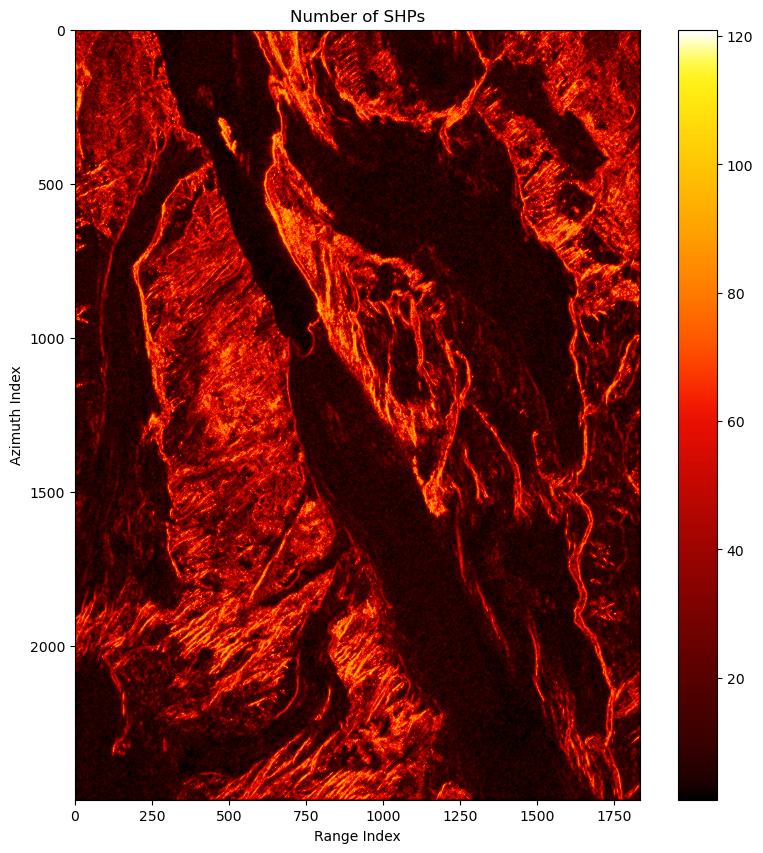

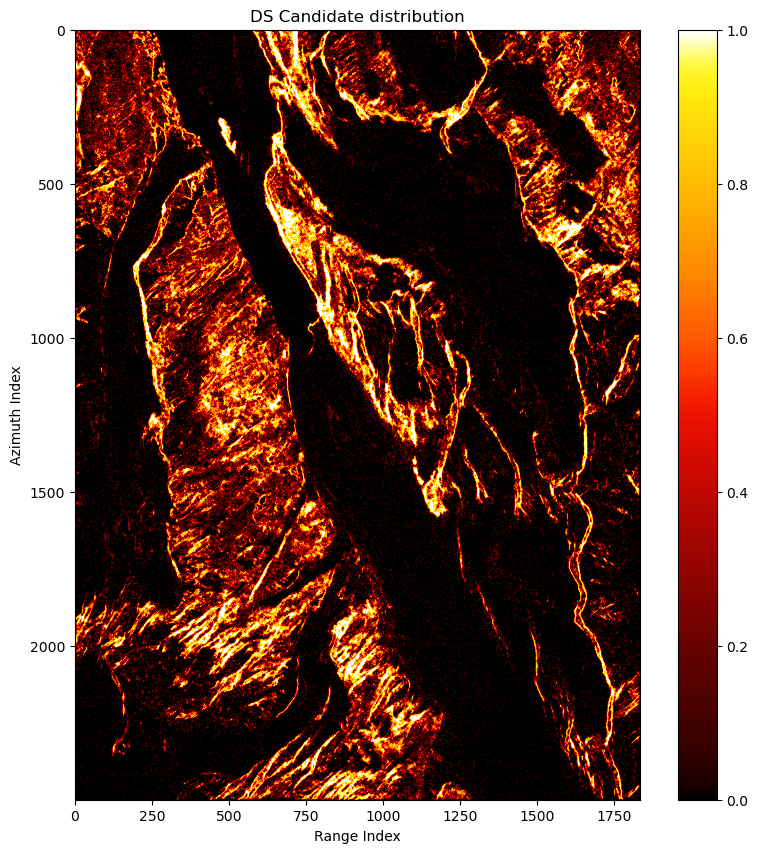

In [ ]:
de_select_ds_can(pvalue,is_shp,is_ds_can,
                 p_max=p_max,az_chunk_size=az_chunk_size,
                 shp_num_fig=shp_num_fig,is_ds_can_fig=is_ds_can_fig)

The output `is_shp` indicate wheather a pixel in the window is a SHP to its center pixel.
`is_ds_can` is a Bool array with same size of one rslc. It indicate if one pixel is DS or not.

## Coherence matrix estimation

Then we estimate the coherence matrix of ds candidate:

In [ ]:
from decorrelation.cli.co import de_emperical_co_sp

In [ ]:
ds_can_coh = './DS_Processing_with_CLI/ds_can_coh.zarr'
az_chunk_size = 1000
ds_can_coh_ave_fig = './DS_Processing_with_CLI/ds_can_coh_ave.png'

2023-09-15 17:55:28 - de_emperical_co_sp - INFO - fetching args:
2023-09-15 17:55:28 - de_emperical_co_sp - INFO - rslc = './DS_Processing_with_CLI/rslc.zarr'
2023-09-15 17:55:28 - de_emperical_co_sp - INFO - is_shp = './DS_Processing_with_CLI/is_shp.zarr'
2023-09-15 17:55:28 - de_emperical_co_sp - INFO - is_ds_can = './DS_Processing_with_CLI/is_ds_can.zarr'
2023-09-15 17:55:28 - de_emperical_co_sp - INFO - ds_can_coh = './DS_Processing_with_CLI/ds_can_coh.zarr'
2023-09-15 17:55:28 - de_emperical_co_sp - INFO - az_chunk_size = 1000
2023-09-15 17:55:28 - de_emperical_co_sp - INFO - ds_can_coh_chunk_size = None
2023-09-15 17:55:28 - de_emperical_co_sp - INFO - ds_can_coh_ave_fig = './DS_Processing_with_CLI/ds_can_coh_ave.png'
2023-09-15 17:55:28 - de_emperical_co_sp - INFO - log = None
2023-09-15 17:55:28 - de_emperical_co_sp - INFO - fetching args done.
2023-09-15 17:55:28 - de_emperical_co_sp - INFO - rslc dataset shape: (2500, 1834, 17)
2023-09-15 17:55:28 - de_emperical_co_sp - INFO 

2023-09-15 17:55:30,476 - distributed.preloading - INFO - Creating preload: dask_cuda.initialize
2023-09-15 17:55:30,476 - distributed.preloading - INFO - Creating preload: dask_cuda.initialize
2023-09-15 17:55:30,476 - distributed.preloading - INFO - Import preload module: dask_cuda.initialize
2023-09-15 17:55:30,476 - distributed.preloading - INFO - Import preload module: dask_cuda.initialize
2023-09-15 17:55:30,480 - distributed.preloading - INFO - Creating preload: dask_cuda.initialize
2023-09-15 17:55:30,480 - distributed.preloading - INFO - Import preload module: dask_cuda.initialize
2023-09-15 17:55:30,482 - distributed.preloading - INFO - Creating preload: dask_cuda.initialize
2023-09-15 17:55:30,482 - distributed.preloading - INFO - Import preload module: dask_cuda.initialize
2023-09-15 17:55:30,482 - distributed.preloading - INFO - Creating preload: dask_cuda.initialize
2023-09-15 17:55:30,482 - distributed.preloading - INFO - Import preload module: dask_cuda.initialize
2023-

2023-09-15 17:55:34 - de_emperical_co_sp - INFO - dask local CUDA cluster started.
2023-09-15 17:55:34 - de_emperical_co_sp - INFO - rslc dask array shape: (2500, 1834, 17)
2023-09-15 17:55:34 - de_emperical_co_sp - INFO - rslc dask array chunks: ((1000, 1000, 500), (1834,), (17,))
2023-09-15 17:55:34 - de_emperical_co_sp - INFO - is_shp dask array shape: (2500, 1834, 11, 11)
2023-09-15 17:55:34 - de_emperical_co_sp - INFO - is_shp dask array chunks: ((1000, 1000, 500), (1834,), (11,), (11,))
2023-09-15 17:55:34 - de_emperical_co_sp - INFO - is_ds_can dask array shape: (2500, 1834)
2023-09-15 17:55:34 - de_emperical_co_sp - INFO - is_ds_can dask array chunks: ((1000, 1000, 500), (1834,))
2023-09-15 17:55:34 - de_emperical_co_sp - INFO - setting shared boundaries between rlsc chunks.
2023-09-15 17:55:34 - de_emperical_co_sp - INFO - rslc dask array with overlap shape: (2520, 1834, 17)
2023-09-15 17:55:34 - de_emperical_co_sp - INFO - rslc dask array with overlap chunks: ((1005, 1010, 50

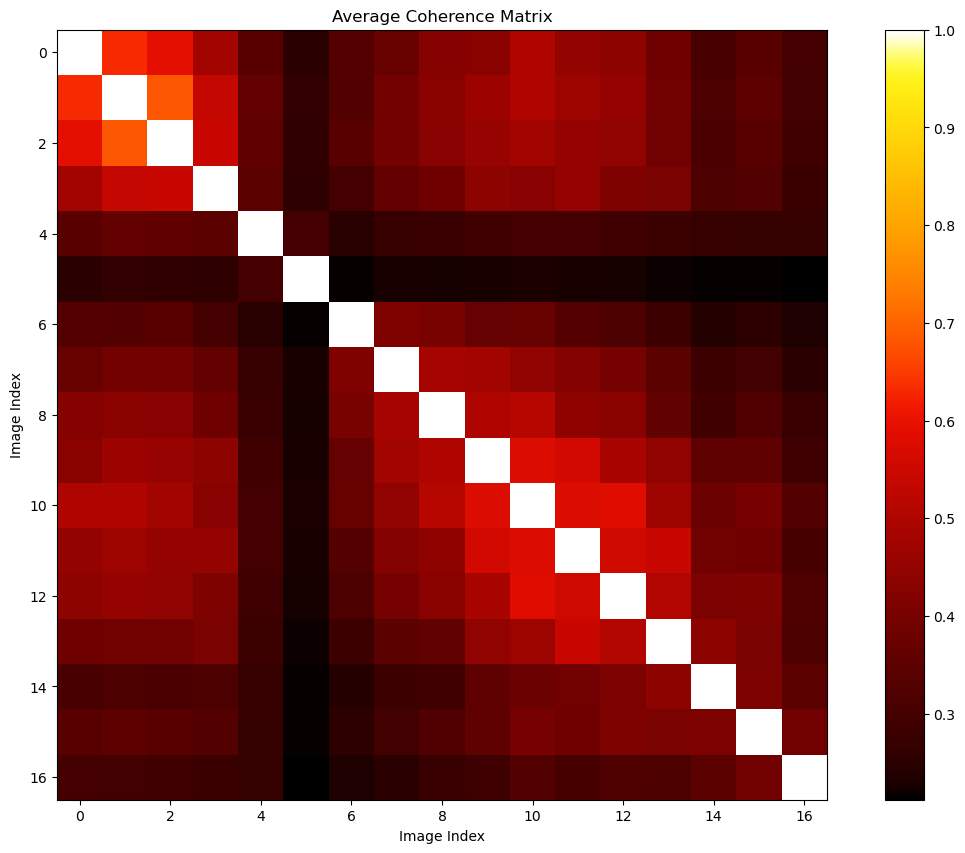

In [ ]:
de_emperical_co_sp(rslc,is_shp,is_ds_can,ds_can_coh,
                   az_chunk_size=az_chunk_size,
                   ds_can_coh_ave_fig=ds_can_coh_ave_fig)

## Phase linking

To get rid of the closure phase, phase linking is applied here:

In [ ]:
from decorrelation.cli.pl import de_emi

In [ ]:
ds_can_ph = './DS_Processing_with_CLI/ds_can_ph.zarr'
ds_can_emi_quality = './DS_Processing_with_CLI/ds_can_emi_quality.zarr'
ref = 0
vmin=1.0
vmax=1.3
emi_quality_fig = './DS_Processing_with_CLI/emi_quality.png'

2023-09-15 17:55:48 - de_emi - INFO - fetching args:
2023-09-15 17:55:48 - de_emi - INFO - coh = './DS_Processing_with_CLI/ds_can_coh.zarr'
2023-09-15 17:55:48 - de_emi - INFO - ph = './DS_Processing_with_CLI/ds_can_ph.zarr'
2023-09-15 17:55:48 - de_emi - INFO - emi_quality = './DS_Processing_with_CLI/ds_can_emi_quality.zarr'
2023-09-15 17:55:48 - de_emi - INFO - ref = 0
2023-09-15 17:55:48 - de_emi - INFO - point_chunk_size = None
2023-09-15 17:55:48 - de_emi - INFO - log = None
2023-09-15 17:55:48 - de_emi - INFO - plot_emi_quality = True
2023-09-15 17:55:48 - de_emi - INFO - vmin = 1.0
2023-09-15 17:55:48 - de_emi - INFO - vmax = 1.3
2023-09-15 17:55:48 - de_emi - INFO - is_ds = './DS_Processing_with_CLI/is_ds_can.zarr'
2023-09-15 17:55:48 - de_emi - INFO - emi_quality_fig = './DS_Processing_with_CLI/emi_quality.png'
2023-09-15 17:55:48 - de_emi - INFO - fetching args done.
2023-09-15 17:55:48 - de_emi - INFO - coh dataset shape: (740397, 17, 17)
2023-09-15 17:55:48 - de_emi - INFO 

2023-09-15 17:55:49,841 - distributed.preloading - INFO - Creating preload: dask_cuda.initialize
2023-09-15 17:55:49,841 - distributed.preloading - INFO - Import preload module: dask_cuda.initialize
2023-09-15 17:55:49,841 - distributed.preloading - INFO - Creating preload: dask_cuda.initialize
2023-09-15 17:55:49,841 - distributed.preloading - INFO - Import preload module: dask_cuda.initialize
2023-09-15 17:55:49,845 - distributed.preloading - INFO - Creating preload: dask_cuda.initialize
2023-09-15 17:55:49,845 - distributed.preloading - INFO - Import preload module: dask_cuda.initialize
2023-09-15 17:55:49,846 - distributed.preloading - INFO - Creating preload: dask_cuda.initialize
2023-09-15 17:55:49,846 - distributed.preloading - INFO - Import preload module: dask_cuda.initialize
2023-09-15 17:55:49,847 - distributed.preloading - INFO - Creating preload: dask_cuda.initialize
2023-09-15 17:55:49,847 - distributed.preloading - INFO - Import preload module: dask_cuda.initialize
2023-

2023-09-15 17:55:53 - de_emi - INFO - dask local CUDA cluster started.
2023-09-15 17:55:53 - de_emi - INFO - coh dask array shape: (740397, 17, 17)
2023-09-15 17:55:53 - de_emi - INFO - coh dask array chunks: ((246799, 246799, 246799), (17,), (17,))
2023-09-15 17:55:53 - de_emi - INFO - phase linking with EMI.
2023-09-15 17:55:53 - de_emi - INFO - got ph and emi_quality.
2023-09-15 17:55:53 - de_emi - INFO - ph dask array shape: (740397, 17)
2023-09-15 17:55:53 - de_emi - INFO - ph dask array chunks: ((246799, 246799, 246799), (17,))
2023-09-15 17:55:53 - de_emi - INFO - emi_quality dask array shape: (740397,)
2023-09-15 17:55:53 - de_emi - INFO - emi_quality dask array chunks: ((246799, 246799, 246799),)
2023-09-15 17:55:53 - de_emi - INFO - saving ph and emi_quality.
2023-09-15 17:55:53 - de_emi - INFO - computing graph setted. doing all the computing.
2023-09-15 17:55:56 - de_emi - INFO - computing finished.
2023-09-15 17:55:58 - de_emi - INFO - dask cluster closed.
2023-09-15 17:55

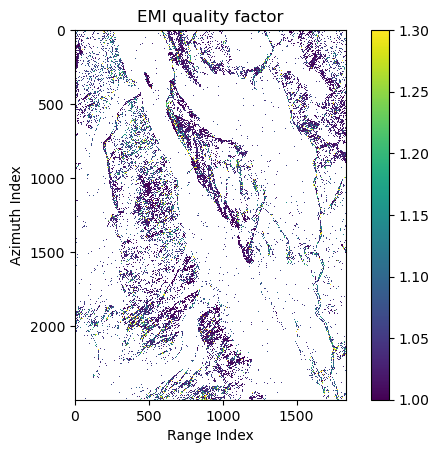

In [ ]:
de_emi(ds_can_coh,ds_can_ph,ds_can_emi_quality,
       ref=ref,point_chunk_size=None,
       plot_emi_quality=True,vmin=vmin,vmax=vmax,
       is_ds=is_ds_can,emi_quality_fig=emi_quality_fig)

Unfinished...